In [1]:
## Dingyi Kang
## A20308046
## Assignment1 - problem 3

import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
xFilePath = '/content/drive/My Drive/x_train.npy'
yFilePath = '/content/drive/My Drive/y_train.npy'
xTestFilePath = '/content/drive/My Drive/x_test.npy'
yTestFilePath = '/content/drive/My Drive/y_test.npy'

In [35]:
# root function to get predicted values of inputs which are generated locally weighted regression model
def locallyWeightedRegression(XTest, XTraining, YTraining, tau):
    #initiate an empty array for predicted target values
    Y_Preds = []
    #gererate and assign esitmated value for each input x
    for point in XTest:
        y = point * localWeight(point, XTraining, YTraining, tau)
        Y_Preds.append(y)
    return np.array(Y_Preds)

# function to generate theta for a input point
def localWeight(point, X, Y, tau):
    # get weight matrix
    wt = kernel(point, X, tau)
    # apply weight matrix in below formula to get the Theta
    theta = (X.T * wt * X).I * (X.T * wt * Y.T)
    return theta

# function to compute weight matrix
def kernel(point, X, tau):
    # get num of examples in training data
    m = np.shape(X)[0]
    # inititate a m*m identity matrix
    weights = np.mat(np.eye((m)))
    # compute and assign weight of this point relative to each point of training data in the diagonal of the matrix
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * tau**2))
    return weights

(100, 1)
(1, 100)


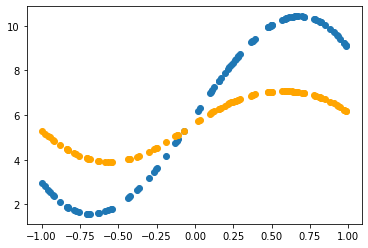

In [42]:
''' load the array data from npy files '''
x = np.load(xFilePath)
y = np.load(yFilePath)
xTs = np.load(xTestFilePath)
yTs = np.load(yTestFilePath)

''' convert the data from array to matrix for ease of matrix operations later '''
xTrain = np.mat(x)
yTrain = np.mat(y)
xTest = np.mat(xTs)
yTest = np.mat(yTs)

''' add bias column to XTrain with values of 1 to represent the bias term'''
print(xTrain.shape)
print(yTrain.shape)
m = np.shape(xTrain)[0]
bias = np.ones((m, 1), dtype = int)
xTrain_ = np.append(xTrain, bias, axis=1)
#print(xTrain_)

''' add bias column to XTest with values of 1 to represent the bias term'''
n = np.shape(xTest)[0]
bias2 = np.ones((n, 1), dtype = int)
xTest_ = np.append(xTest, bias2, axis=1)
#print(xTest_)
''' testing with tau value of 0.5 '''
pred_y = locallyWeightedRegression(xTest_, xTrain_, yTrain, 0.5).reshape(n)
#print(pred_y)
plt.scatter(xTs, yTs)
plt.scatter(xTs, pred_y, color='orange')

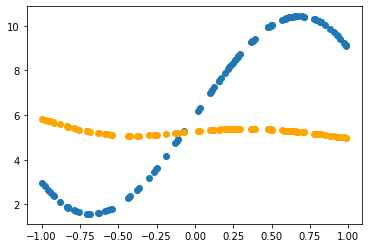

In [43]:
''' testing with tau value of 0.8 '''
pred_y = locallyWeightedRegression(xTest_, xTrain_, yTrain, 0.8).reshape(n)
#print(pred_y)
plt.scatter(xTs, yTs)
plt.scatter(xTs, pred_y, color='orange')

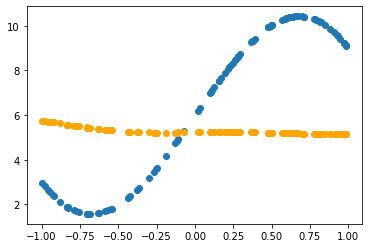

In [46]:
''' testing with tau value of 1.0 '''
pred_y = locallyWeightedRegression(xTest_, xTrain_, yTrain, 0.9).reshape(n)
#print(pred_y)
plt.scatter(xTs, yTs)
plt.scatter(xTs, pred_y, color='orange')

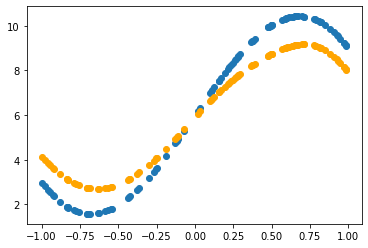

In [47]:
''' testing with tau value of 0.3 '''
pred_y = locallyWeightedRegression(xTest_, xTrain_, yTrain, 0.3).reshape(n)
#print(pred_y)
plt.scatter(xTs, yTs)
plt.scatter(xTs, pred_y, color='orange')

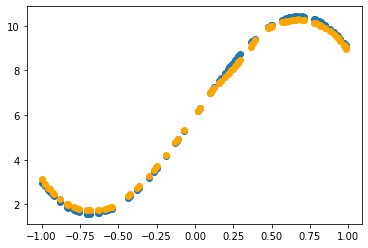

In [48]:
''' testing with tau value of 0.1 '''
pred_y = locallyWeightedRegression(xTest_, xTrain_, yTrain, 0.1).reshape(n)
#print(pred_y)
plt.scatter(xTs, yTs)
plt.scatter(xTs, pred_y, color='orange')

Through comparing above figures with different tau values, we can see the fit of the model gets worse as the tau value increase and gets better as the tau value decreases. And the model gets it best fit at tau value of 0.1 among above examples.

Answers 1: we don't need any basis functions when implementing locally weighted regression model since it is non-parametric

Answer 2 -- the difference between implementations of parametric linear regression model and that locally weighted regression model: in the implementation of locally weighted regression models, there is no vector of optimal parameters generated. Instead, we create a function which needs to use the training data every time it is called to predict target values. When we want to predict target values of new inputs using this function, we pass both new inputs and the training dataset into the function, and this function will estimate the expected value of the input based on its weights to different points in the trainning data. Hence, the training data will be reused for calculating the value of each input. In contrast, in the implementation of parametric linear regression model, we get a vector of parameters after training model and apply the parameters to new values when we want to predict target values of new values. In the process prediction, no training data information will be reused. What is more, in the implemention of the model of question, we has to think about feature engineering. In contrast, in the implemention of the model of locally weighted regression, we don't need worry about parameters and feature engineering at all. The thing we need to worry about in this case is if taking inverse of the matrix is too computationally expensive.